# Learning Slowdown

I'll train an FFNN to illustrate the learning slowdown problem.

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline 

X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

input_size=2
middle_size = 2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real

#Las variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1")

W_layer2 = tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")

hidden_1 = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
y = tf.nn.sigmoid(tf.matmul(hidden_1,W_layer2)+b_layer2)
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [3]:
# We are going to save the weights of every iteration in the trainning process
delta_w1 = []
delta_w2 = []
sess.run(init)
for i in range(100000):
    sess.run(train_step, feed_dict={x: X, y_: Y})
    delta_w1 += [sess.run(W_layer1)]
    delta_w2 += [sess.run(W_layer2)]

W1 = delta_w1[-1]
W2 = delta_w2[-1]

l1 = [np.mean(w / W1) for w in delta_w1]
l2 = [np.mean(w / W2) for w in delta_w2]

x = range(100000)

Now to illustrate the slowdown in learning I'm going to plot the proportion of the weights at each iteration step against their final weight.

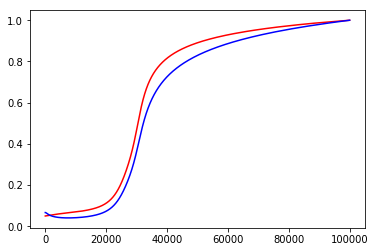

In [4]:
plt.plot(x, l1, 'r-') # red line represents the weights of the rightmost layer
plt.plot(x, l2, 'b-') # blue line represents the wights of the leftmost layer
plt.show()

sess.close()

We can see that the rightmost layer converges faster to it's final weights.